## Meta data checking with site clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme()

In [2]:
water = pd.read_csv('../Dataset/water_preprocesseddata.csv')
water.shape

(265, 30)

In [3]:
water.head()

,sample_id,cluster,Country,General_Vegetation,Weather,Hydrogeomorphology,Intermittent_or_Perennial,Sediment,US.or.DS.of.Gauge,Precipitation.Within.Week,...,NPOC_mg.L.asC,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,Richness observed,Simpson's Diversity Index
0,SW_S19S.0003_U_1,Average,0,15,3,2,1,3,0,1,...,1.27,-140.0,-18.75,0.30,9.80,0.19,0.04,0.07,2335,0.999572
1,SW_S19S.0003_U_2,Average,0,15,3,2,1,3,0,1,...,1.80,NaN,NaN,0.31,8.03,0.23,0.04,0.07,2560,0.999609
2,SW_S19S.0003_U_3,Most,0,15,3,2,1,3,0,1,...,1.15,NaN,NaN,0.31,8.62,0.23,0.04,0.06,2782,0.999641
3,SW_S19S.0004_U_1,Most,0,7,1,2,1,1,1,1,...,1.96,-129.3,-17.13,1.83,6.53,0.12,0.04,0.07,2823,0.999646
4,SW_S19S.0004_U_2,Most,0,7,1,2,1,1,1,1,...,1.93,NaN,NaN,2.00,6.66,0.12,0.04,0.08,2869,0.999651


In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sample_id                          265 non-null    object 
 1   cluster                            265 non-null    object 
 2   Country                            265 non-null    int64  
 3   General_Vegetation                 265 non-null    int64  
 4   Weather                            265 non-null    int64  
 5   Hydrogeomorphology                 265 non-null    int64  
 6   Intermittent_or_Perennial          265 non-null    int64  
 7   Sediment                           265 non-null    int64  
 8   US.or.DS.of.Gauge                  265 non-null    int64  
 9   Precipitation.Within.Week          265 non-null    int64  
 10  Dam.Upstream.Site                  265 non-null    int64  
 11  Stream_Order                       227 non-null    float64

In [5]:
water['cluster'].value_counts()

Most       147
Average     90
Least       28
Name: cluster, dtype: int64

#### check missing value per column

In [6]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n", water.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 sample_id                              0
cluster                                0
Country                                0
General_Vegetation                     0
Weather                                0
Hydrogeomorphology                     0
Intermittent_or_Perennial              0
Sediment                               0
US.or.DS.of.Gauge                      0
Precipitation.Within.Week              0
Dam.Upstream.Site                      0
Stream_Order                          38
River_Gradient                         0
Distance_DS.and.MS_meters              0
Distance_MS.and.US_meters              0
Primary.Sources.Flow.Variation         0
pH                                     0
Temp_degC                              0
Approx.Distance.From.Gauge_meters      0
Number.Days.Since.Precip             101
NPOC_mg.L.asC                          0
del2H_permil                         182
del18O_permil                        182
Cl_m

In [7]:
water[water['Cl_mgL'].isnull()]

,sample_id,cluster,Country,General_Vegetation,Weather,Hydrogeomorphology,Intermittent_or_Perennial,Sediment,US.or.DS.of.Gauge,Precipitation.Within.Week,...,NPOC_mg.L.asC,del2H_permil,del18O_permil,Cl_mgL,SO4_mgL,NO3_mgL,NO2_mgL,F_mgL,Richness observed,Simpson's Diversity Index
5,SW_S19S.0004_U_3,Most,0,7,1,2,1,1,1,1,...,1.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2802,0.999643
89,SW_S19S.0035_U_3,Average,6,11,7,2,1,1,0,1,...,10.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2763,0.999638


In [8]:
colmiss = ['Stream_Order', #cat
           'Number.Days.Since.Precip', #num
           'del2H_permil', #num
           'del18O_permil'] #num

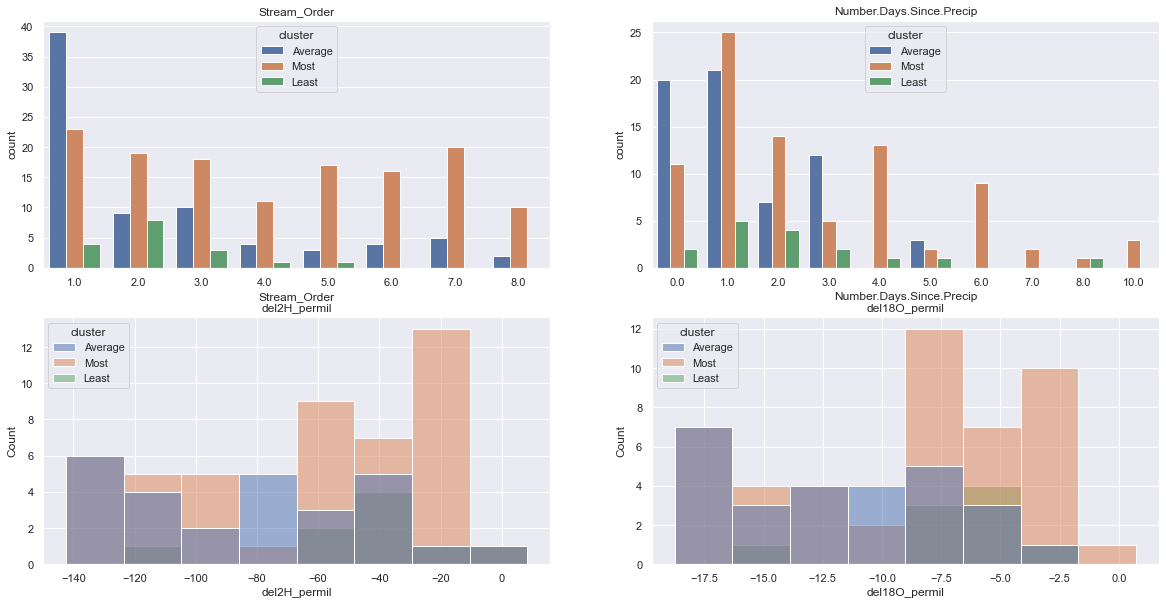

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
f,axs = plt.subplots(2,2)
axs = axs.ravel()

cnt = 0
for i in colmiss:
    if cnt < 2:
        sns.countplot(data=water, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    if cnt >= 2:
        sns.histplot(data=water, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

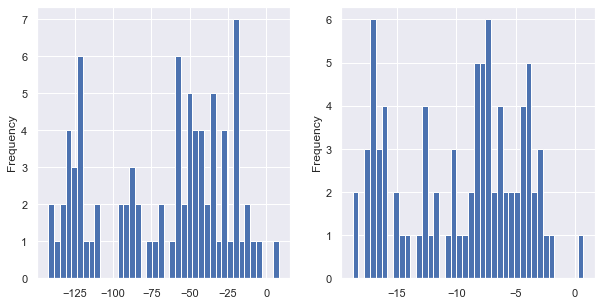

In [10]:
cnt = 1
plt.figure(figsize=(10,5))
for i in [2,3]:
    plt.subplot(1,2,cnt)
    cnt=cnt+1
    water[colmiss[i]].plot(kind='hist', bins=40)

In [11]:
water[colmiss].describe()

,Stream_Order,Number.Days.Since.Precip,del2H_permil,del18O_permil
count,227.000000,164.000000,83.000000,83.000000
mean,3.484581,2.182927,-67.207229,-9.570482
std,2.329777,2.165701,41.534945,5.063865
min,1.000000,0.000000,-142.400000,-18.750000
25%,1.000000,1.000000,-111.000000,-14.440000
50%,3.000000,1.000000,-57.500000,-8.120000
75%,5.500000,3.000000,-34.250000,-5.730000
max,8.000000,10.000000,8.300000,0.720000


In [12]:
water['cluster'].value_counts()

Most       147
Average     90
Least       28
Name: cluster, dtype: int64

In [13]:
# Count total NaN at three columns by cluster in a DataFrame
water[colmiss].isna().groupby(water.cluster, sort=False).sum().reset_index()

,cluster,Stream_Order,Number.Days.Since.Precip,del2H_permil,del18O_permil
0,Average,14,27,63,63
1,Most,13,62,100,100
2,Least,11,12,19,19


In [14]:
#### Missing data imputation
# drop the two rows
# use mean/mode to impute

#### categorical

In [15]:
target = ['cluster']

# 12
colcat = ['Country',
          'General_Vegetation',
          'Weather',
          'Hydrogeomorphology',
          'Intermittent_or_Perennial',
          'Sediment',
          'US.or.DS.of.Gauge',
          'Precipitation.Within.Week',
          'Dam.Upstream.Site',
          'Stream_Order',
          'River_Gradient',
          'Primary.Sources.Flow.Variation']

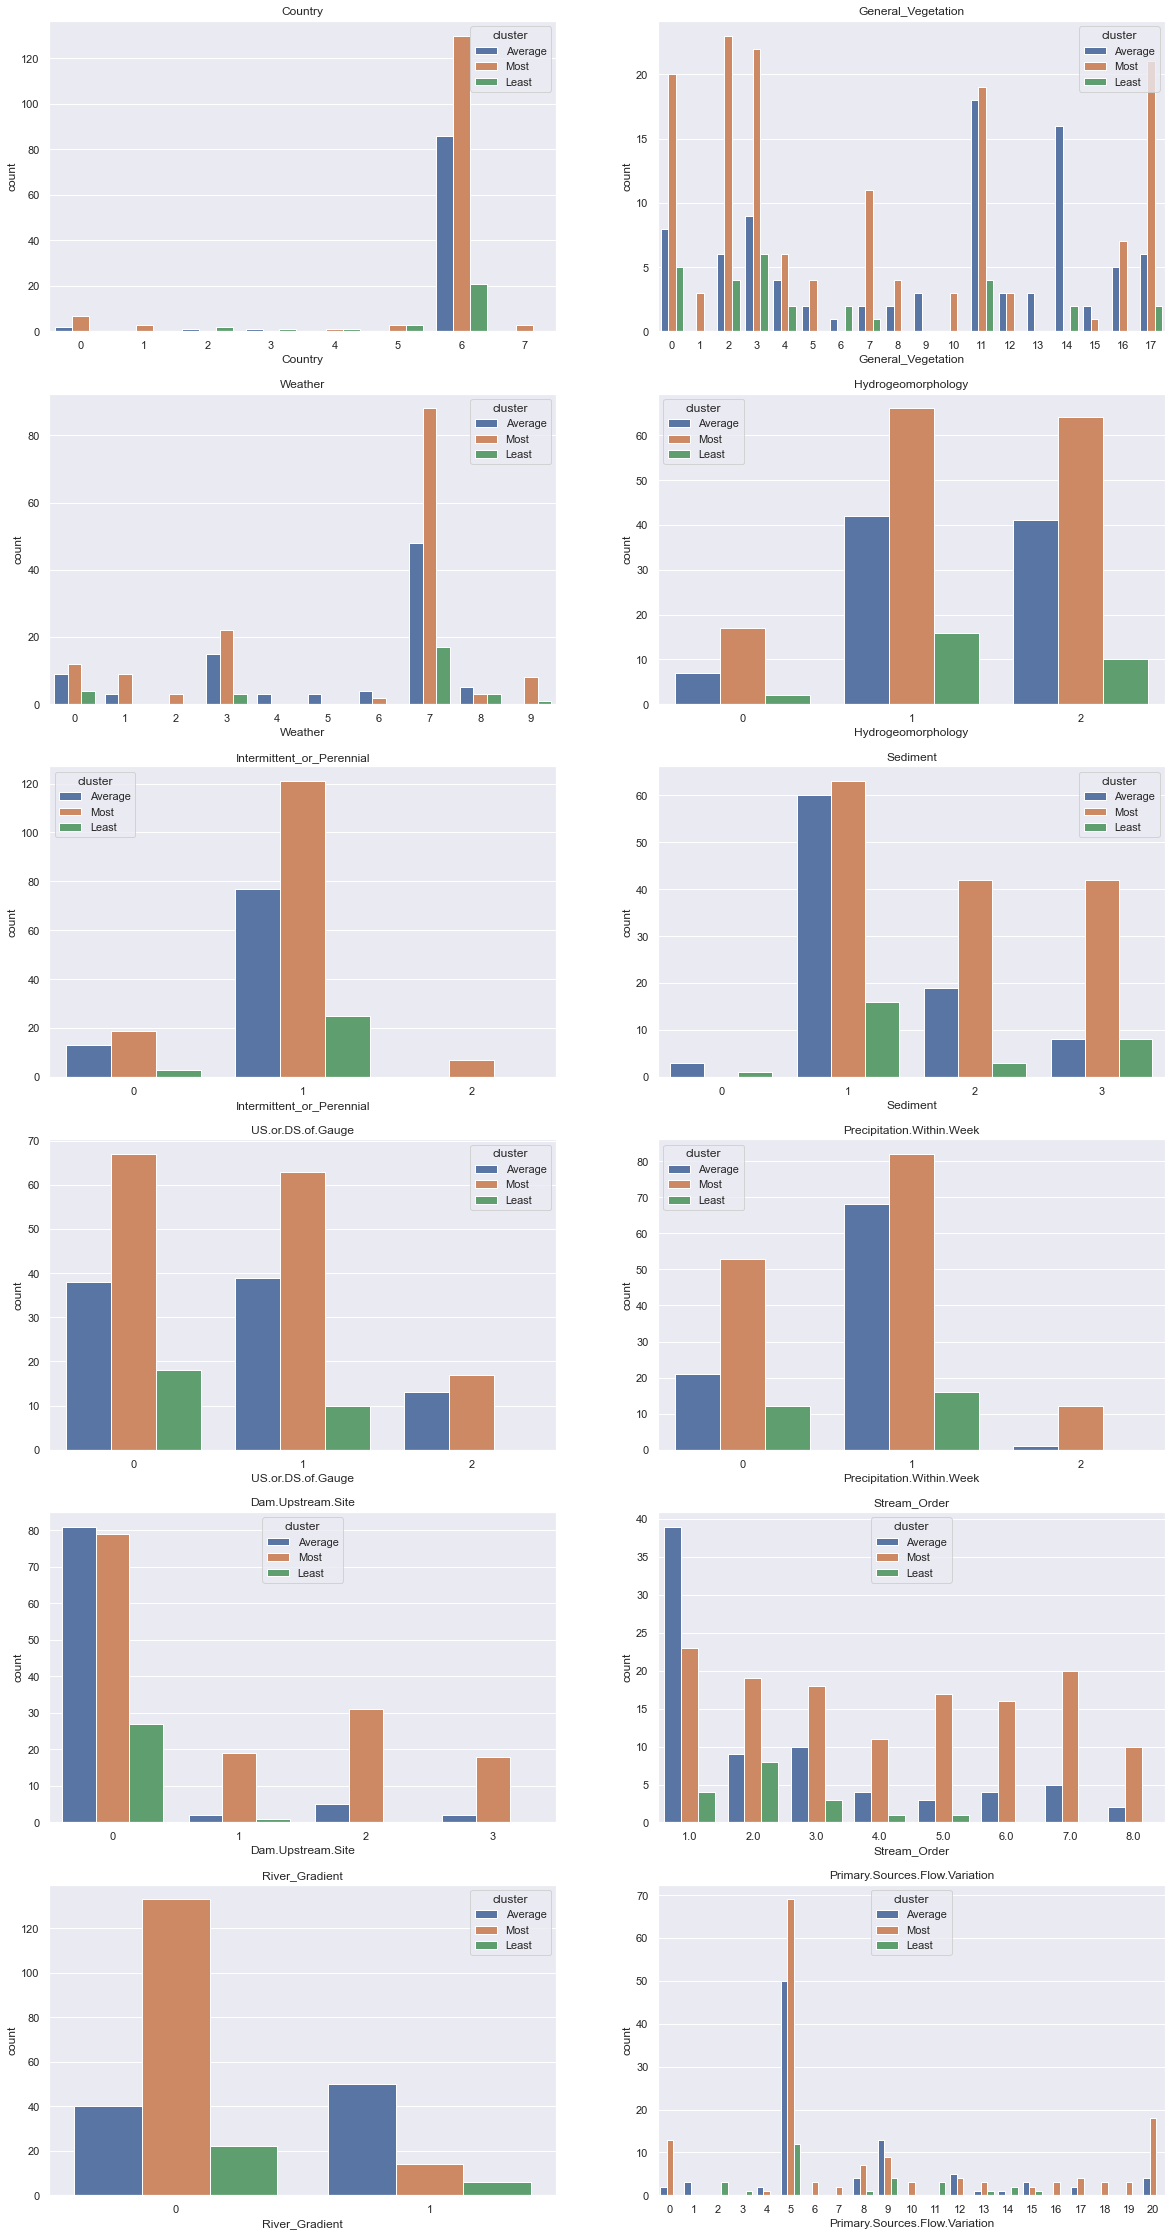

In [16]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(6,2)
axs = axs.ravel()

cnt = 0
for i in colcat:
    sns.countplot(data=water, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

#### numerical

In [17]:
target = ['cluster']
# 16
colnum = ['Distance_DS.and.MS_meters',
          'Distance_MS.and.US_meters',
          'pH',
          'Temp_degC',
          'Approx.Distance.From.Gauge_meters',
          'Number.Days.Since.Precip',
          'NPOC_mg.L.asC', 
          'del2H_permil',
          'del18O_permil',
          'Cl_mgL',
          'SO4_mgL',
          'NO3_mgL',
          'NO2_mgL',
          'F_mgL',
          'Richness observed',
          'Simpson\'s Diversity Index']

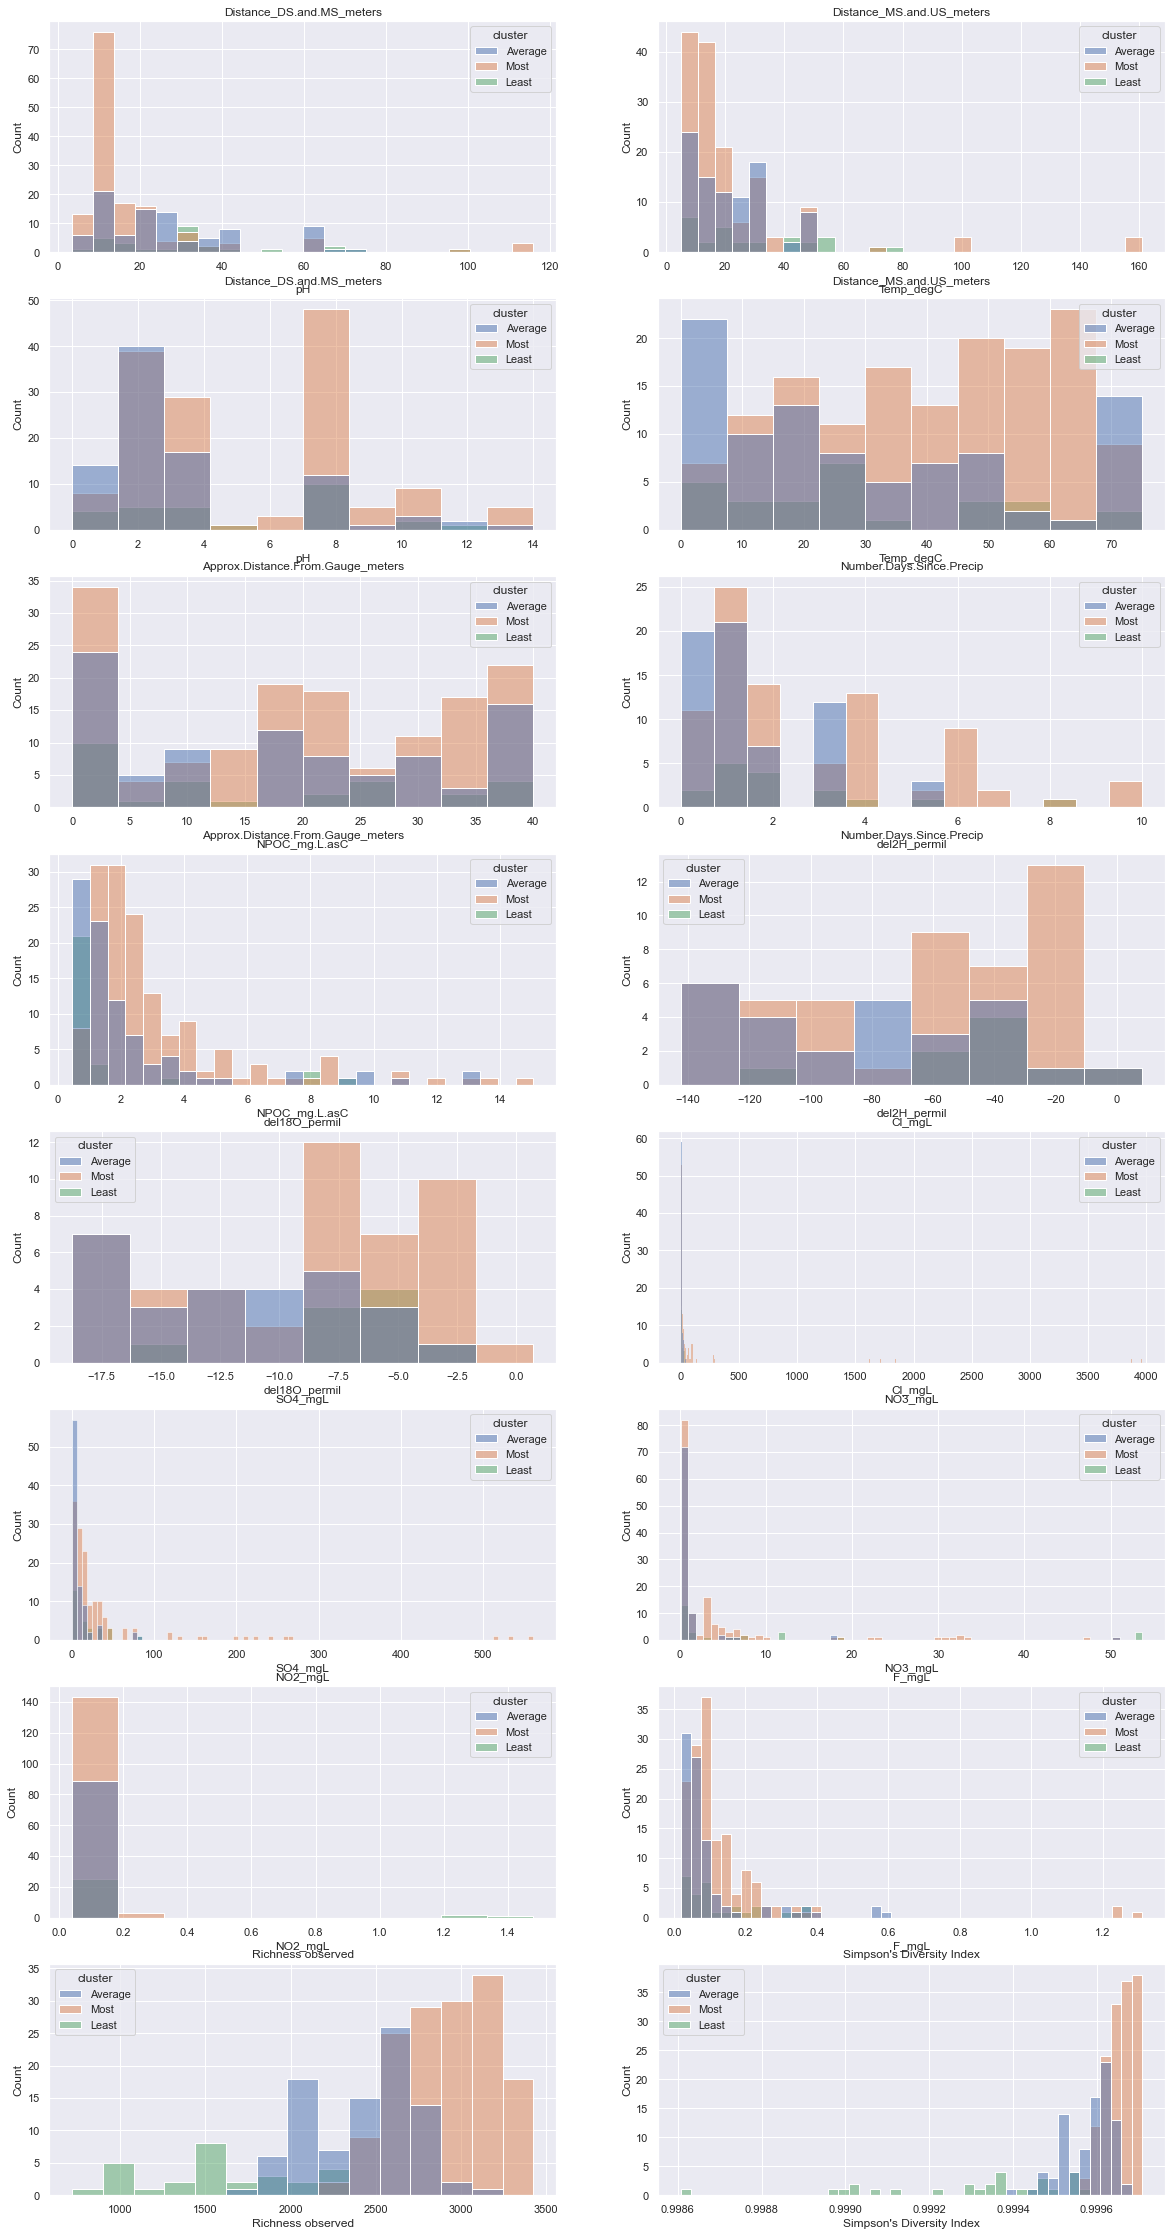

In [18]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(8,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.histplot(data=water, x=i, ax=axs[cnt], hue='cluster').set_title(i)
    cnt = cnt + 1

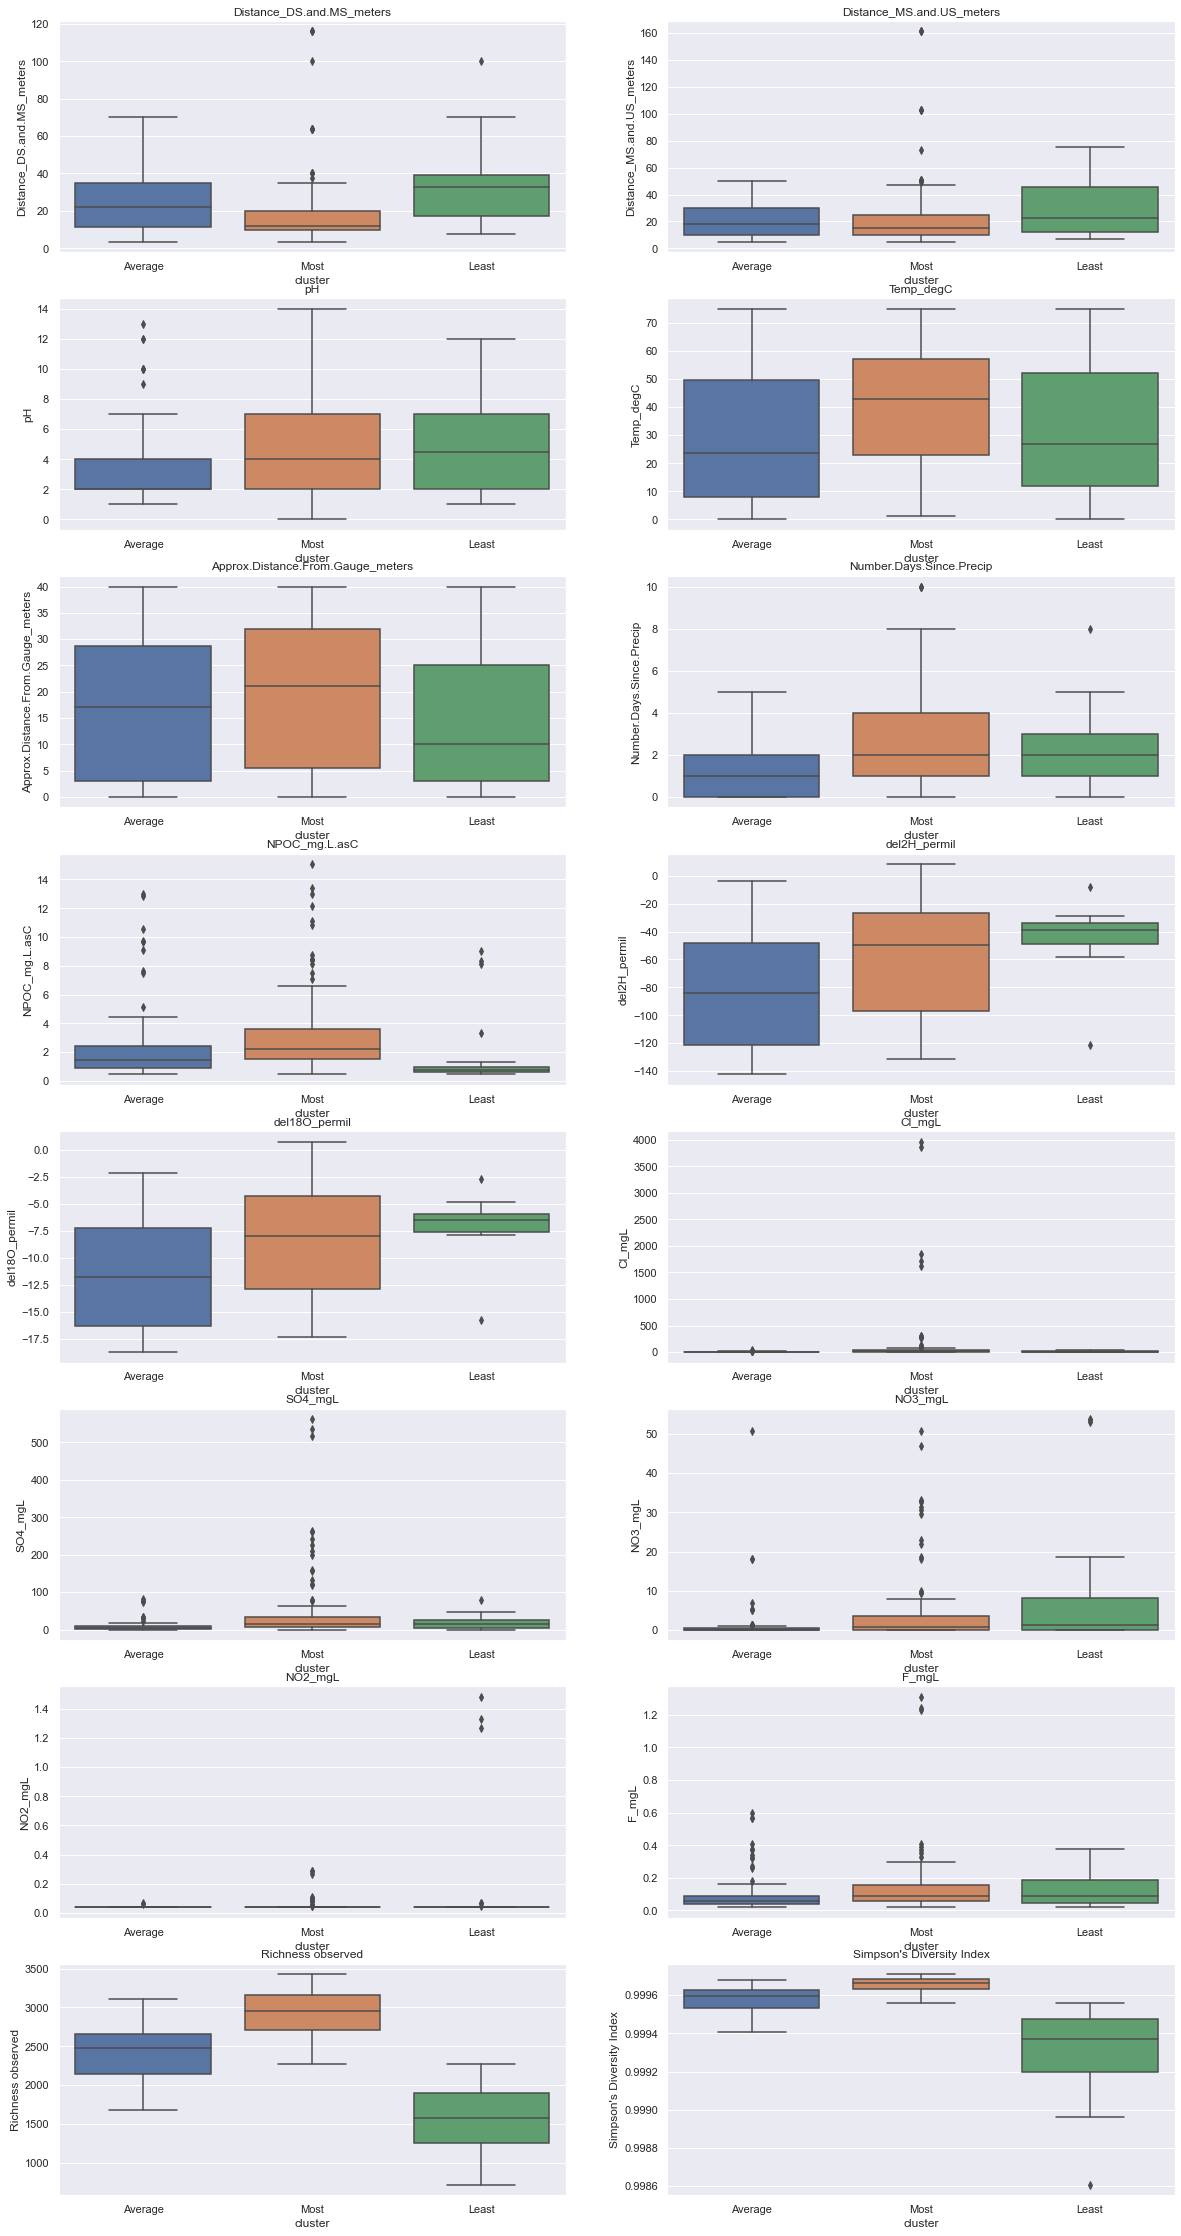

In [19]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(8,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.boxplot(x='cluster', y=i, data=water, orient='v', ax=axs[cnt]).set_title(i)
    cnt = cnt + 1

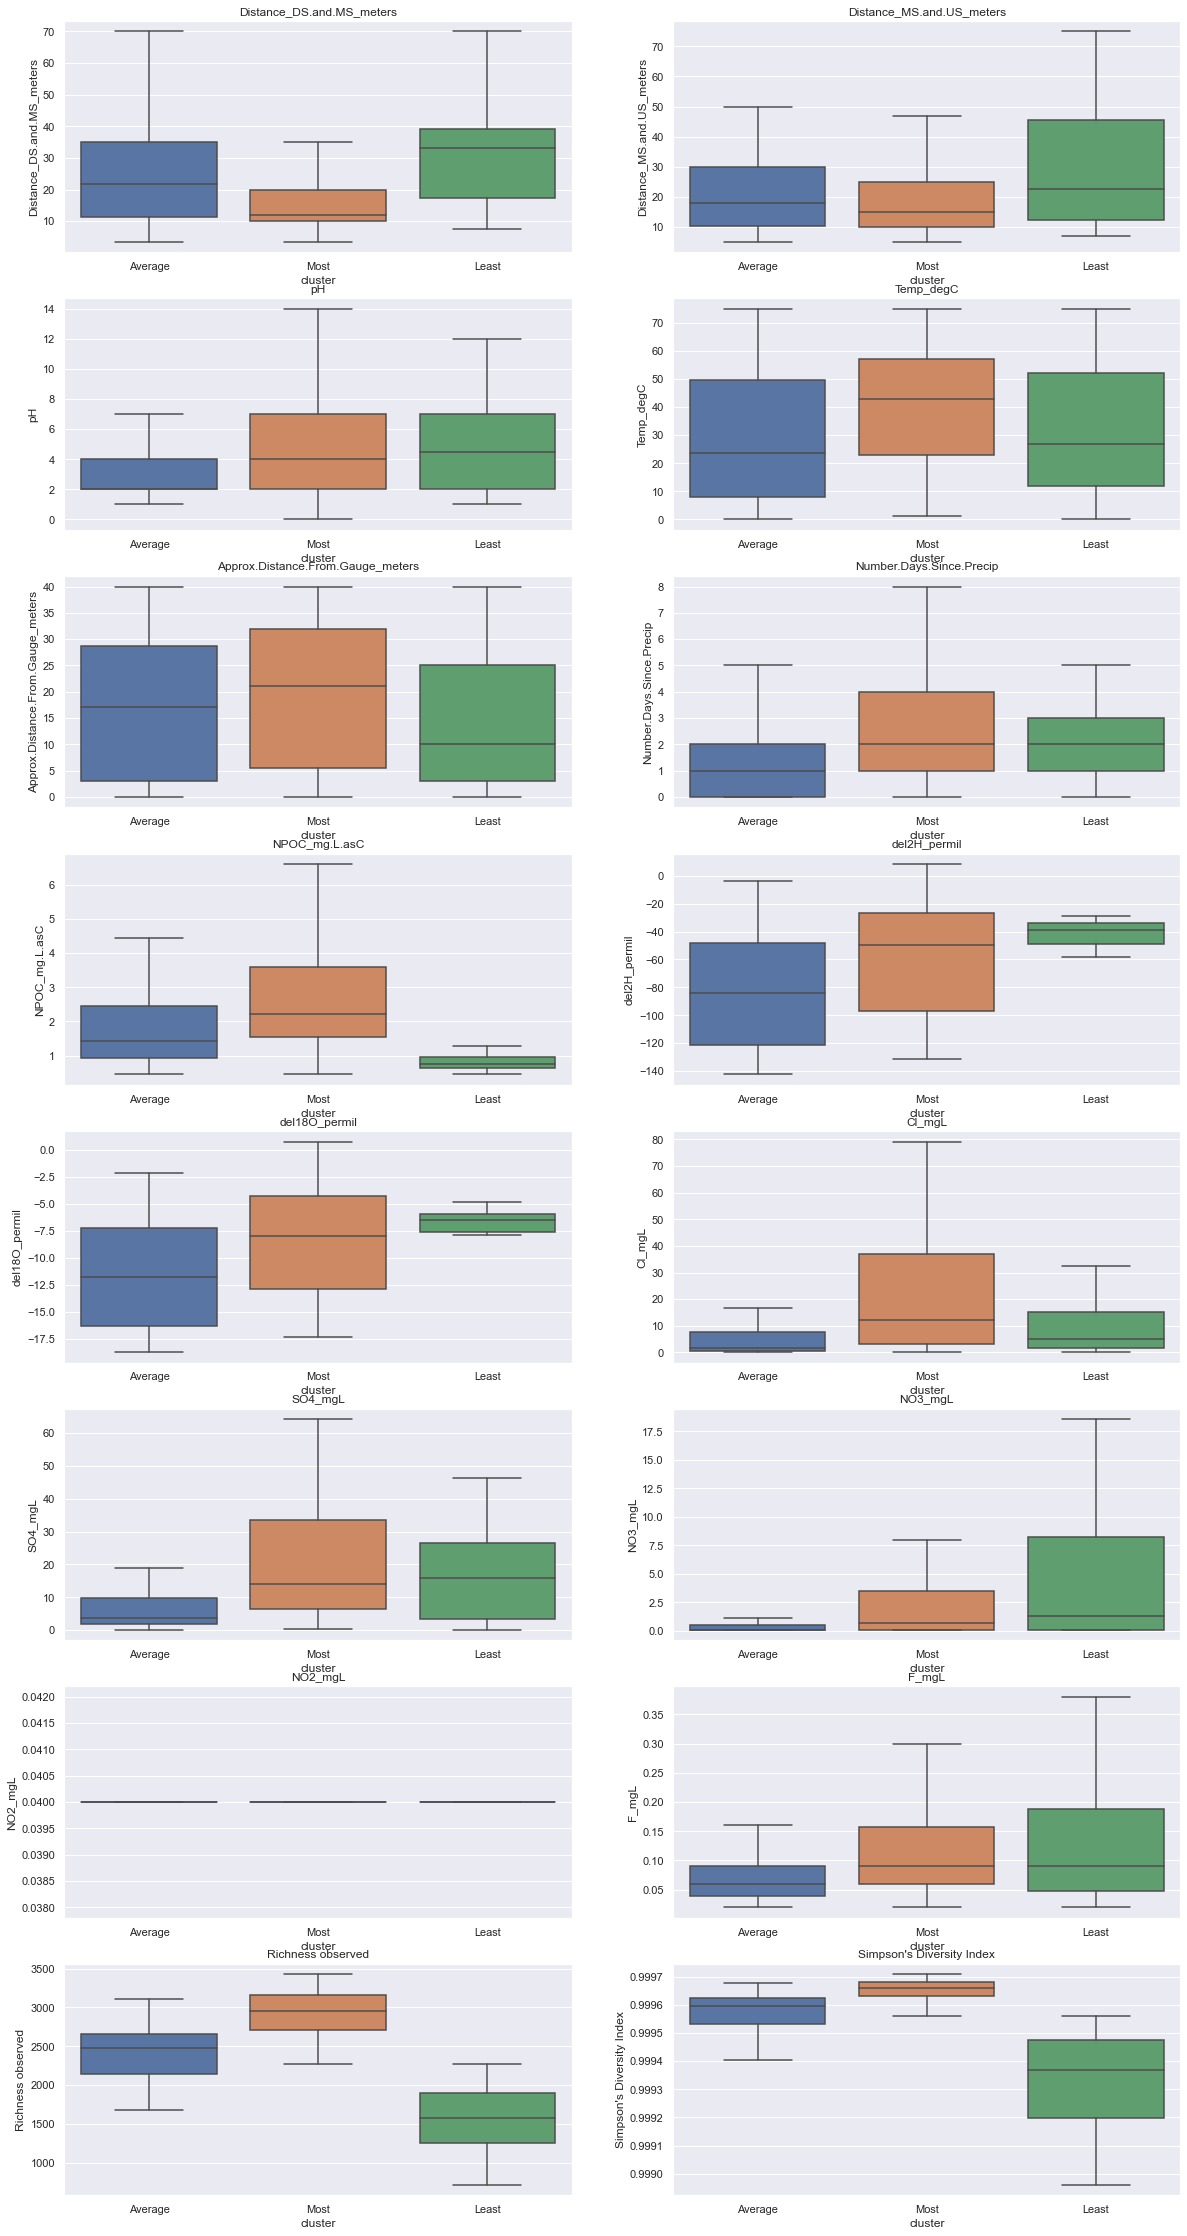

In [ ]:
sns.set(rc={'figure.figsize':(20,40)})
f,axs = plt.subplots(8,2)
axs = axs.ravel()

cnt = 0
for i in colnum:
    sns.boxplot(x='cluster', y=i, data=water, orient='v', ax=axs[cnt], showfliers = False).set_title(i)
    cnt = cnt + 1

#### Discussion

Currently we did a site clustering since we were using the water dataset where sample_id as rows and Jaccard indices as columns for the clustering (PCA followed by kMeans).  The initial assumptions would be to identify which sites are similar / different from each other in terms of Jaccard diversity indices, then from there we look at the CF composition (top CF per cluster) and the differences in meta data (boxplot). Then, Flo’s model could investigate what’re the important features that drive such differences, assuming the CF composition (DOM clusters) are related to sites.

To follow up with the comments, I would like to clarify:
(1)	Could one site be represented by one dominant DOM cluster or if it is usually a mixture of different DOM clusters? 
(2)	Should we perform DOM clustering using site data or if there are existing guidelines in the ecological domain for DOM cluster definition e.g. cluster by molecular weight, H/C ratios etc which could be used for DOM clustering instead? 

There were many great suggestions on what to look at in the 3 clusters; for example:
A.     molecular properties such as diversity indices, classes (i.e. lignin, aliphatic compounds), NOSC, H/C  and O/C ratios, DBE, AI_Mod…..
B.     a focus on environmental processes:  NPOC/Fe representing more "terrestrial" inputs VS 18O/2H that might represent more groundwater inputs
